In [10]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [11]:
#import Numpy and Pandas for data frame operations

import numpy as np
import pandas as pd
import pprint
import os
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
# display all coumns in data frame
pd.options.display.max_columns = None


#declare Rootdirectory for loading files into data frames

ROOTDIR =r"C:\Sneha\Upgrad\EDA Case Study"



*****************************------------------******************************
Task #1: Data loading
Import and read the Uber Request Data into data frames and name it as ubr

In [12]:
file1 = os.path.join(ROOTDIR, 'loan.csv') 

#print(ROOTDIR) 
loan=pd.read_csv(r'loan.csv')

In [13]:
#Check Meta data
loan.shape

(39717, 111)

In [14]:
#Check datatypes
loan.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

In [15]:
#Check for Duplicates
loan.id.nunique()
loan['emp_length_new'] = loan['emp_length']
loan.emp_length_new.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [ ]:
#Convert Data types for Date fields and float fields
loan['issue_d'] = pd.to_datetime(loan['issue_d'],format='%b-%y', yearfirst=False)
loan['last_pymnt_d'] = pd.to_datetime(loan['last_pymnt_d'],format='%b-%y', yearfirst=False)

In [17]:

# replace % symbol in intrest rate and convert to numeric data type
loan['int_rate'] = loan['int_rate'].str.replace("%", "", case = False) 
loan['int_rate'] = loan['int_rate'].fillna(0.0).astype(float)



In [18]:
#check for null values
round(loan.isnull().sum(axis=0)/len(loan.index)*100,2)



id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

In [19]:
#loan.columns[loan.isnull().mean() != 1]
loan=loan[loan.columns[loan.isnull().mean() != 1]]
loan.shape
#loan.head(10)


(39717, 58)

In [20]:
#Drop less significant columns
loan=loan.drop(['next_pymnt_d','url','collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','pub_rec_bankruptcies','tax_liens'], axis=1)
loan.head(10)
loan=loan.drop(['zip_code','addr_state','initial_list_status','out_prncp','out_prncp_inv','pymnt_plan','desc'],axis=1)
loan.shape
loan=loan.drop(['mths_since_last_delinq','mths_since_last_record'],axis=1)
loan.shape


(39717, 39)

In [21]:
loan=loan.assign(Annual_Inc_Bin=pd.cut(loan['annual_inc'],[0,10000,25000,50000,75000,100000,1000000,5000000],labels=['0-10K','10-25k','25-50k','50-75k','75-100k','100K-1m','above_1m']))

In [22]:
#Create a user defined function to categorise years of emplyment into appropriate bins 
loan.emp_length.unique()

def emp_len_df(x):
    if (x['emp_length'] == '< 1 year') :
        return 'Below 1Yr'
    elif (x['emp_length']=='1 year' or x['emp_length']=='2 years'or x['emp_length']=='3 years'):
        return '1Yr-3Yr'
    elif (x['emp_length']=='4 years' or x['emp_length']=='5 years'or x['emp_length']=='6 years'):
        return '4Yr-6Yr'
    elif (x['emp_length']=='7 years' or x['emp_length']=='8 years'or x['emp_length']=='9 years'):
        return '7Yr-9Yr'
    elif (x['emp_length']=='10+ years'):
        return 'Above 10Yr'
             

In [23]:
def emp_len_clean(x):
    if (x['emp_length'] == '< 1 year') :
        return '1'
    elif (x['emp_length']=='1 year'):
        return '1'
    elif (x['emp_length']=='2 years' ):
        return '2'
    elif (x['emp_length']=='3 years' ):
        return '3'
    elif (x['emp_length']=='4 year'):
        return '4'
    elif (x['emp_length']=='5 years'):
        return '5'
    elif (x['emp_length']=='6 years'):
        return '6'
    elif (x['emp_length']=='7 year'):
        return '7'
    elif (x['emp_length']=='8 years'):
        return '8'
    elif (x['emp_length']=='9 years'):
        return '9'
    elif (x['emp_length']=='10+ years'):
        return '10'
    elif (x['emp_length']=='n/a'):
        return '0'

In [24]:
def dti_Bin_df(x):
    if (x['dti'] <=1):
        return '0-1%'
    elif (x['dti']>1 and x['dti'] <=10):
        return '1-10%'
    elif (x['dti']> 10 and x['dti'] <=15):
        return '10-15%'
    elif (x['dti']> 15 and x['dti'] <=20):
        return '15-20%'
    elif (x['dti']> 20 and x['dti'] <=25):
        return '20-25'
    elif (x['dti']> 25 ):
        return 'above_25%'
         

In [25]:
#Create  deriveds column and assign valused using udf above
#loan = loan.assign(Annual_Inc_Bin=loan.apply(Income_Bin_df, axis=1))
loan = loan.assign(Emp_Len_Bin=loan.apply(emp_len_df, axis=1))
loan = loan.assign(dti_Bin=loan.apply(dti_Bin_df, axis=1))
loan = loan.assign(emp_length_new=loan.apply(emp_len_clean, axis=1))
loan['emp_length_new'] = loan['emp_length_new'].fillna(0.0).astype(float)
#Check data

In [44]:
loan['int_rate'].describe()
#Average Interest rate is 12% across entire dat set
#Any records with interest rate above mean is considered high and equal/below is considered low
loan['interest_payments'] = np.nan
lst = [loan]

for col in lst:
    col.loc[col['int_rate'] <= 12, 'interest_payments'] = 'Low'
    col.loc[col['int_rate'] > 12, 'interest_payments'] = 'High'
    
loan.head()



,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,emp_length_new,Annual_Inc_Bin,Emp_Len_Bin,dti_Bin,interest_payments
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,12/11/2018,Fully Paid,credit_card,Computer,27.65,0,Jan-85,1,3,0,13648,83.70%,9,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,1/15/2018,171.62,5/16/2018,10.0,10-25k,Above 10Yr,above_25%,Low
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,12/11/2018,Charged Off,car,bike,1.00,0,Apr-99,5,3,0,1687,9.40%,4,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,4/13/2018,119.66,9/13/2018,1.0,25-50k,Below 1Yr,0-1%,High
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,12/11/2018,Fully Paid,small_business,real estate business,8.72,0,1-Nov,2,2,0,2956,98.50%,10,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,6/14/2018,649.91,5/16/2018,10.0,10-25k,Above 10Yr,1-10%,High
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,12/11/2018,Fully Paid,other,personel,20.00,0,Feb-96,1,10,0,5598,21%,37,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,1/15/2018,357.48,4/16/2018,10.0,25-50k,Above 10Yr,15-20%,High
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,12/11/2018,Current,other,Personal,17.94,0,Jan-96,0,15,0,27783,53.90%,38,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,5/16/2018,67.79,5/16/2018,1.0,75-100k,1Yr-3Yr,15-20%,High


In [45]:
loan['annual_inc'].describe()
#median income for entire data set is 58500 
loan['income_category'] = np.nan
lst = [loan]

for col in lst:
    col.loc[col['annual_inc'] <= 58500, 'income_category'] = 'Low'
    col.loc[(col['annual_inc'] > 58500) & (col['annual_inc'] <= 200000), 'income_category'] = 'Medium'
    col.loc[col['annual_inc'] > 200000, 'income_category'] = 'High'
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,emp_length_new,Annual_Inc_Bin,Emp_Len_Bin,dti_Bin,interest_payments,income_category
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,12/11/2018,Fully Paid,credit_card,Computer,27.65,0,Jan-85,1,3,0,13648,83.70%,9,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,1/15/2018,171.62,5/16/2018,10.0,10-25k,Above 10Yr,above_25%,Low,Low
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,12/11/2018,Charged Off,car,bike,1.00,0,Apr-99,5,3,0,1687,9.40%,4,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,4/13/2018,119.66,9/13/2018,1.0,25-50k,Below 1Yr,0-1%,High,Low
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,12/11/2018,Fully Paid,small_business,real estate business,8.72,0,1-Nov,2,2,0,2956,98.50%,10,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,6/14/2018,649.91,5/16/2018,10.0,10-25k,Above 10Yr,1-10%,High,Low
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,12/11/2018,Fully Paid,other,personel,20.00,0,Feb-96,1,10,0,5598,21%,37,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,1/15/2018,357.48,4/16/2018,10.0,25-50k,Above 10Yr,15-20%,High,Low
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,12/11/2018,Current,other,Personal,17.94,0,Jan-96,0,15,0,27783,53.90%,38,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,5/16/2018,67.79,5/16/2018,1.0,75-100k,1Yr-3Yr,15-20%,High,Medium


In [86]:
#consider top 5 loan purposes to do analysis on various segments
df_top_freq = loan.groupby(['purpose'])['id'].count().sort_values(ascending=False).head(5).reset_index()

# debt_consolidation,credit_card,other,home_improvement	,major_purchase
lf=loan[loan['purpose'].isin(['debt_consolidation','credit_card','other','home_improvement','major_purchase'])]
#lf

****************************------------------*******************************
Plot a bargraph on Loan statusas to know the percentage of each status type across all customers
X-axis: Loan Status 
Y-axis: % of customer count

In [37]:
a=pd.DataFrame({'Percentage' : loan.groupby( [ "loan_status"] ).size()/39717*100}).reset_index()
a['Percentage']=a['Percentage'].fillna(0.0).astype(int)
a=a.sort_values(['Percentage']).reset_index(drop=True)
a

,loan_status,Percentage
0,Current,2
1,Charged Off,14
2,Fully Paid,82


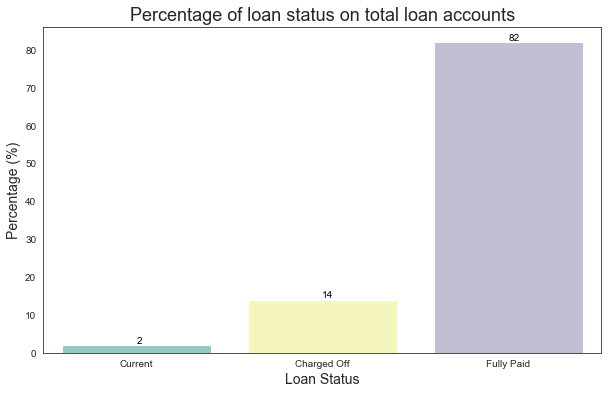

In [38]:
# Set seaborn setings for chart
fig, ax = plt.subplots(figsize = (10,6))
#color_palette_list = ['#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9', '#C1F0F6', '#0099CC']
sns.barplot(x=a['loan_status'], y = a['Percentage'], data = a, ax=ax, ci=None)
ax.set_title("Percentage of loan status on total loan accounts",fontsize=18)
#ax.set(xlabel="Loan Status", ylabel='Percentage (%)')
ax.set_xlabel("Loan Status",fontsize=14)
ax.set_ylabel("Percentage (%)",fontsize=14)
# to reflect data lables on the bars
for i, v in enumerate(a["Percentage"].iteritems()):        
    ax.text(i ,v[1], "{:,}".format(v[1]), color='black', va ='bottom')

Text(0,0.5,'% of Status of Loans')

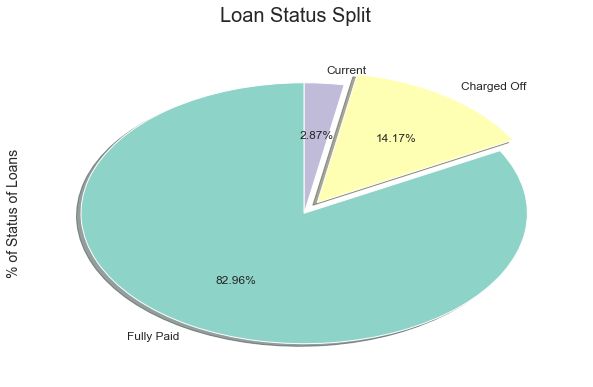

In [34]:
f, ax = plt.subplots(figsize=(10,6))

colors = ["#3791D7", "#D72626"]
#labels ="Good Loans", "Bad Loans"

plt.suptitle('Loan Status Split', fontsize=20)

loan["loan_status"].value_counts().plot.pie( autopct='%1.2f%%',  explode = (0, 0.1, 0),shadow=True, 
                                              fontsize=12, startangle=90)


# ax[0].set_title('State of Loan', fontsize=16)
ax.set_ylabel('% of Status of Loans', fontsize=14)

Observation: Plot percentage of each loan status against total loans
1. Charges-off/Default loans are at 14.17% against overall loans 

In [30]:
a=pd.DataFrame({'count' : loan.groupby( [ "grade","loan_status"] ).size()}).reset_index()
b=pd.DataFrame({'Total_Count' : loan.groupby( [ "grade"] ).size()}).reset_index()
#a['Percentage']=a['Percentage'].fillna(0.0).astype(int)
#a=a.sort_values(['Percentage']).reset_index(drop=True)

gf = pd.merge(a, b[['grade', 'Total_Count']],
                       how='left', on=['grade'])

gf['status_percentage']=(gf['count']/gf['Total_Count'])*100
gf['status_percentage']=gf['status_percentage'].fillna(0.0).astype(int)
gf = gf.sort_values(['loan_status','status_percentage']).reset_index(drop=True)
#gf


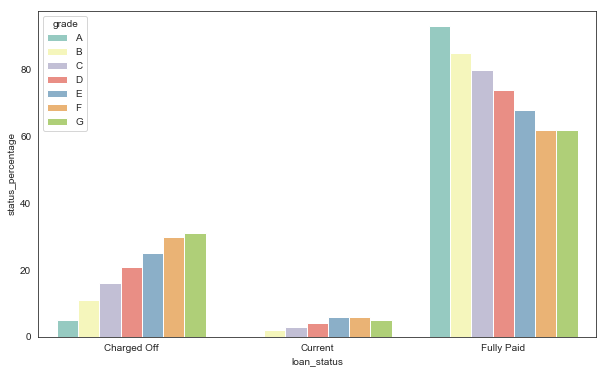

In [33]:
fig, ax = plt.subplots(figsize = (10,6))
sns.barplot(x='loan_status', y='status_percentage', hue='grade', data=gf)


###### Observation: Chart is plotted for Percentage of number of loans in each Grade against each Loan Status
1. Loans issued on higher grades i.e A,B..are paid off
2. Major percentage of Charged_off/defaulted loans are from lower grades i.e G,F,E and D 

Text(0,0.5,'Loan Status : Charged Off')

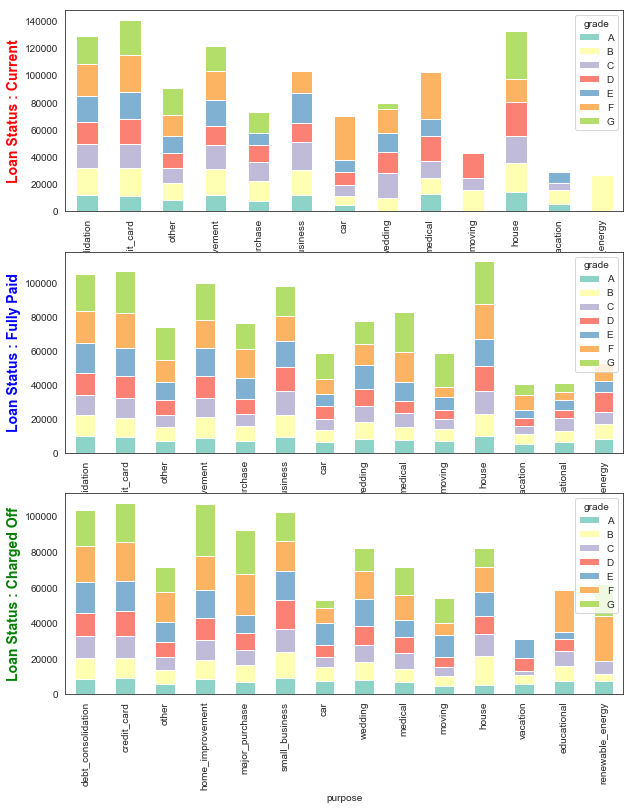

In [32]:
import matplotlib.pyplot as plt
sns.set_style('white')
cmap = plt.cm.hot
descending_order = loan['purpose'].value_counts().sort_values(ascending=False).index
fig, axarr = plt.subplots(3, 1, figsize=(10, 10))
plt.subplots_adjust(bottom=0.1,top=2)
loan[loan.loan_status == 'Fully Paid'].groupby(['purpose','grade'])['loan_amnt'].mean().reindex(index=descending_order, level=0).unstack().plot(kind='bar', 
                                                              stacked=True,figsize=(10,5) , ax=axarr[1])

loan[loan.loan_status == 'Charged Off'].groupby(['purpose','grade'])['loan_amnt'].mean().reindex(index=descending_order, level=0).unstack().plot(kind='bar', 
                                                              stacked=True,figsize=(10,5) , ax=axarr[2])

loan[loan.loan_status == 'Current'].groupby(['purpose','grade'])['loan_amnt'].mean().reindex(index=descending_order, level=0).unstack().plot(kind='bar', 
                                                              stacked=True,figsize=(10,5) , ax=axarr[0])

axarr[0].set_ylabel('Loan Status : Current',color = "Red",size=14, weight="bold")
axarr[1].set_ylabel('Loan Status : Fully Paid',color = "Blue",size=14, weight="bold")
axarr[2].set_ylabel('Loan Status : Charged Off',color = "Green",size=14, weight="bold")

###### Observation: sub plot for each loan status gainst purpose split by grade values
1. Charged-off: Customers with grades between G,F,E  had taken most of the loan amounts
2.Debt Consoliation has more frequency of purpose among all

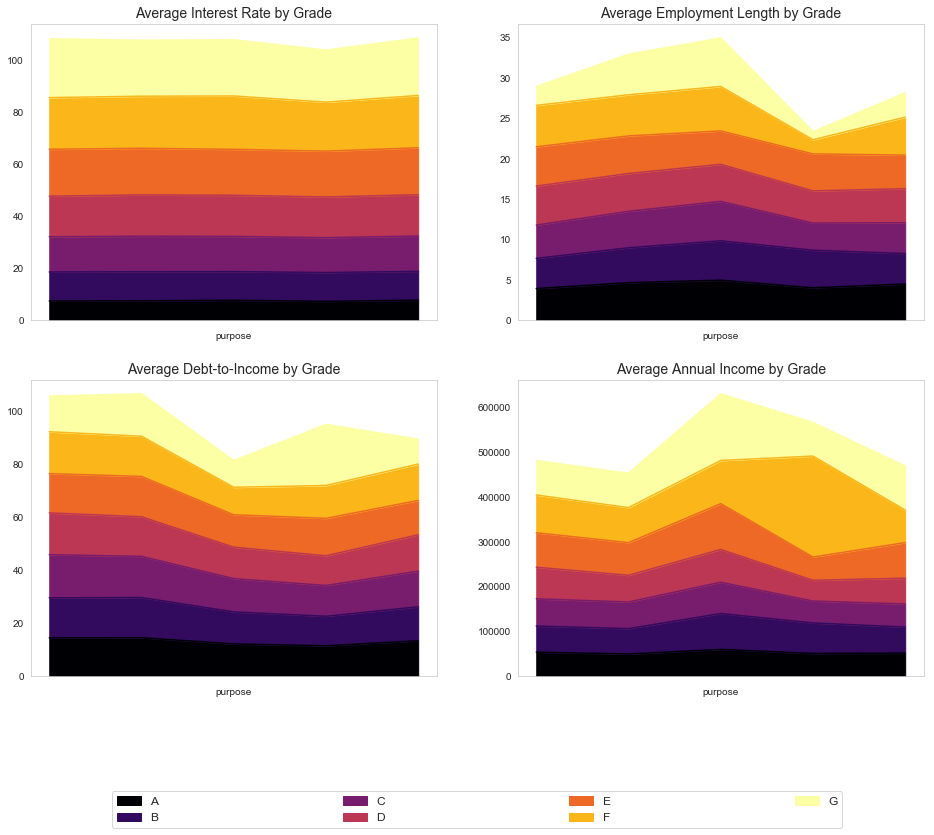

In [39]:
# Loan issued by Purpose and by Credit Score grade


sns.set_style('whitegrid')

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
cmap = plt.cm.inferno
#fig.tight_layout()




by_interest_rate = lf[lf.loan_status == 'Charged Off'].groupby(['purpose', 'grade']).int_rate.mean()
by_interest_rate.unstack().plot(kind='area', stacked=True, colormap=cmap, grid=False, legend=False, ax=ax1, figsize=(16,12))
ax1.set_title('Average Interest Rate by Grade', fontsize=14)
plt.setp(ax1.get_xticklabels(), visible=True)

by_employment_length = lf[lf.loan_status == 'Charged Off'].groupby(['purpose', 'grade']).emp_length_new.mean()
by_employment_length.unstack().plot(kind='area', stacked=True, colormap=cmap, grid=False, legend=False, ax=ax2, figsize=(16,12))
ax2.set_title('Average Employment Length by Grade', fontsize=14)


by_dti = lf[lf.loan_status == 'Charged Off'].groupby(['purpose', 'grade']).dti.mean()
by_dti.unstack().plot(kind='area', stacked=True, colormap=cmap, grid=False, legend=False, ax=ax3, figsize=(16,12))
ax3.set_title('Average Debt-to-Income by Grade', fontsize=14)

by_income = lf[lf.loan_status == 'Charged Off'].groupby(['purpose', 'grade']).annual_inc.mean()
by_income.unstack().plot(kind='area', stacked=True, colormap=cmap, grid=False, ax=ax4, figsize=(16,12))
ax4.set_title('Average Annual Income by Grade', fontsize=14)
ax4.legend(bbox_to_anchor=(-1.0, -0.5, 1.8, 0.1), loc=10,prop={'size':12},
           ncol=4, mode="expand", borderaxespad=0.)

###### Observations: 4 charts are plotted for Chared-off status against 4 variables that play a major role in defining Credit Scores 
1.Average interest rates are higher for home_improvemnet,Debt_consolidation and other for the Grades G,F and E respectively
2.Average employment length is at higherside for home_improvement, debt_consolidation and credit_Card categores for the grades G,E,F repectively
3. Average DTI is at higer side for credit_card,debt_consolidation,other categories for the Grades G,F and E respectively
4.Average Annual incomes are higher for home_improvement,credit_card and debt_consolidation for the Grades G,F and E respectively
5.Factors that increase risk include: low annual income, high debt to income, high interest rates, low grade, among others.

X-Axis: credit_card ,	debt_consolidation	,home_improvement,	major_purchase,	other


[None, None, None, None, None, None, None, None, None, None]

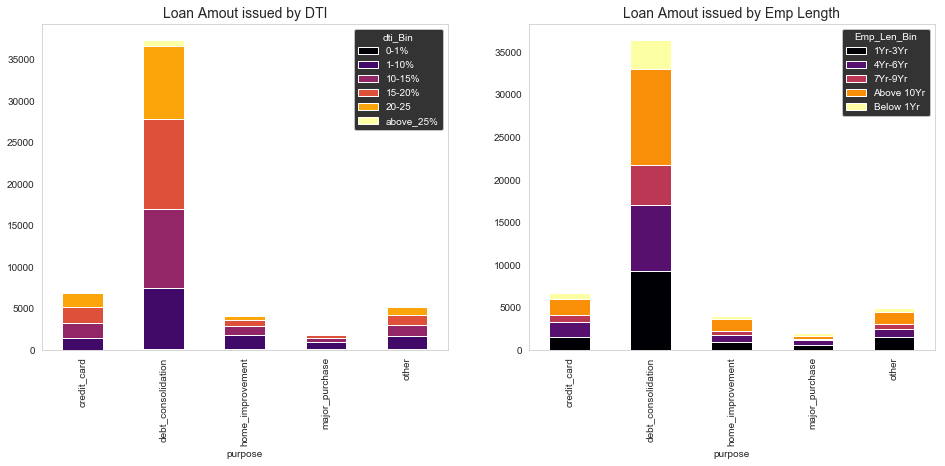

In [40]:
#plt.style.use('ggplot')
f, ((ax1, ax2)) = plt.subplots(1, 2)
plt.style.use('dark_background')
#cmap = plt.cm.spring

by_interest_rate = lf[lf.loan_status == 'Charged Off'].groupby(['purpose', 'dti_Bin']).loan_amnt.sum()/1000
by_interest_rate.unstack().plot(kind='bar', stacked=True, colormap=cmap, grid=False, legend=True, ax=ax1, figsize=(16,6))
ax1.set_title('Loan Amout issued by DTI', fontsize=14)
plt.setp(ax1.get_xticklabels(), visible=True)


by_employment_length = lf[lf.loan_status == 'Charged Off'].groupby(['purpose', 'Emp_Len_Bin']).loan_amnt.sum()/1000
by_employment_length.unstack().plot(kind='bar', stacked=True, colormap=cmap, grid=False, legend=True, ax=ax2, figsize=(16,6))
ax2.set_title('Loan Amout issued by Emp Length', fontsize=14)
plt.setp(ax2.get_xticklabels(), visible=True)



###### Observation: Plot graph for loan amounts that are bad(defaulted) against 5 major pourposes split by DTI range
1. Major loan amounts are issued for Debt Consolidation
2. Default accounts have DTS ranging between 10-25%
3. Employment length with more than 10 yrs occupying major chunk of bad loans folowed by 1-3 yrs and 4-6 yrs

In [41]:
lf_correlations = loan[['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti','open_acc','revol_bal','total_acc','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt','emp_length_new']]
lf_cr = lf_correlations.corr()
lf_cr

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,open_acc,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,emp_length_new
loan_amnt,1.000000,0.981578,0.940034,0.309415,0.930288,0.271149,0.066439,0.177168,0.317597,0.256442,0.886613,0.854243,0.852021,0.729726,0.044706,0.135446,0.072853,0.448742,0.144415
funded_amnt,0.981578,1.000000,0.958422,0.312619,0.956159,0.266965,0.066283,0.175530,0.310392,0.250589,0.903160,0.870799,0.870255,0.737469,0.046705,0.136284,0.074676,0.453133,0.142919
funded_amnt_inv,0.940034,0.958422,1.000000,0.306657,0.905039,0.254375,0.074689,0.163027,0.290797,0.242854,0.881228,0.913257,0.845848,0.730914,0.027172,0.123759,0.060358,0.442604,0.148027
int_rate,0.309415,0.312619,0.306657,1.000000,0.282703,0.053185,0.111162,0.010395,0.097100,-0.043570,0.308268,0.303670,0.186882,0.529913,0.092591,0.122259,0.066380,0.157775,0.008821
installment,0.930288,0.956159,0.905039,0.282703,1.000000,0.270874,0.054186,0.172812,0.312679,0.230824,0.856928,0.817416,0.850773,0.634725,0.056709,0.118152,0.075467,0.401688,0.118313
annual_inc,0.271149,0.266965,0.254375,0.053185,0.270874,1.000000,-0.122732,0.158200,0.279961,0.235771,0.257980,0.247119,0.259571,0.185476,0.006243,0.021589,0.015604,0.140401,0.114276
dti,0.066439,0.066283,0.074689,0.111162,0.054186,-0.122732,1.000000,0.288045,0.228743,0.229881,0.064766,0.071647,0.041316,0.106071,-0.011781,0.024878,0.011033,0.005212,0.043695
open_acc,0.177168,0.175530,0.163027,0.010395,0.172812,0.158200,0.288045,1.000000,0.288964,0.686635,0.162663,0.152937,0.160631,0.124499,-0.018627,0.016396,0.006219,0.078865,0.095754
revol_bal,0.317597,0.310392,0.290797,0.097100,0.312679,0.279961,0.228743,0.288964,1.000000,0.313602,0.293204,0.277543,0.281419,0.243000,0.003823,0.042091,0.022400,0.120371,0.147722
total_acc,0.256442,0.250589,0.242854,-0.043570,0.230824,0.235771,0.229881,0.686635,0.313602,1.000000,0.225077,0.219244,0.231242,0.147792,-0.024715,0.023281,0.010551,0.162841,0.191238


In [42]:
#Use this below command in Anaconda command prompt and re-run the code in case of module not found error.
# conda install -c https://conda.anaconda.org/plotly plotly

import sys
sys.path

# Plotly visualizations
from plotly import tools
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

trace = go.Heatmap(z=lf_cr.values,
                   x=lf_cr.columns,
                   y=lf_cr.columns,
                  colorscale=[[0.0, 'rgb(165,0,38)'], 
                              [0.1111111111111111, 'rgb(215,48,39)'], 
                              [0.2222222222222222, 'rgb(244,109,67)'], 
                              [0.3333333333333333, 'rgb(253,174,97)'], 
                              [0.4444444444444444, 'rgb(254,224,144)'], 
                              [0.5555555555555556, 'rgb(224,243,248)'], 
                              [0.6666666666666666, 'rgb(171,217,233)'], 
                              [0.7777777777777778, 'rgb(116,173,209)'], 
                              [0.8888888888888888, 'rgb(69,117,180)'], 
                              [1.0, 'rgb(49,54,149)']],
            colorbar = dict(
            title = 'Level of Correlation',
            titleside = 'top',
            tickmode = 'array',
            tickvals = [-0.52,0.2,0.95],
            ticktext = ['Negative Correlation','Low Correlation','Positive Correlation'],
            ticks = 'outside'
        )
                  )


layout = {"title": "Correlation Heatmap"}
data=[trace]
fig = dict(data=data, layout=layout)
iplot(fig, filename='labelled-heatmap')

ModuleNotFoundError: No module named 'plotly'

Text(0.5,1,'Loan Amount Distribution \n by Home Ownership')

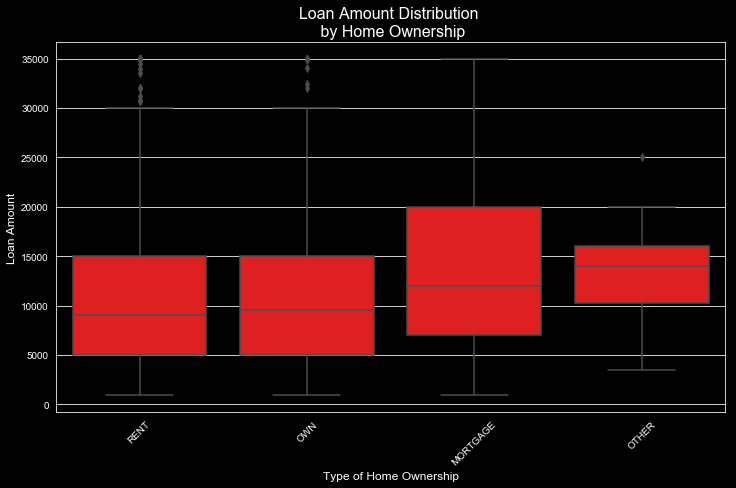

In [43]:
plt.figure(figsize=(12,15))

# Create a dataframe for bad loans
bx = loan.loc[loan['loan_status'] == 'Charged Off']

plt.subplot(211)
g = sns.boxplot(x='home_ownership', y='loan_amnt', 
               data=bx, color='r')

g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Type of Home Ownership", fontsize=12)
g.set_ylabel("Loan Amount", fontsize=12)
g.set_title("Loan Amount Distribution \n by Home Ownership", fontsize=16)

###### Observation: Plot a graph for loan ampunt distribution across home ownership values
Mortgage is the variable from the home ownership column that used the highest amount borrowed within loans that are defaulted

In [ ]:
loan['annual_inc'].describe()

Text(0,0.5,'Count')

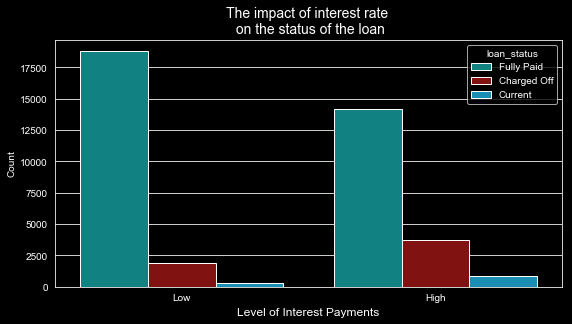

In [46]:
plt.figure(figsize=(20,10))
cmap=plt.cm.spring
color_palette_list = ['#009393',  '#930000','#009ACD','#ADD8E6',   '#0099CC']
plt.subplot(221)
ax = sns.countplot(x='interest_payments', data=loan, palette=color_palette_list,
                  hue='loan_status')

ax.set_title('The impact of interest rate \n on the status of the loan', fontsize=14)
ax.set_xlabel('Level of Interest Payments', fontsize=12)
ax.set_ylabel('Count')

###### Observation:
High interest rates which are above 12% are contributing more to bad loans
low interst rates are benifitting payments

Text(0,0.5,'Count')

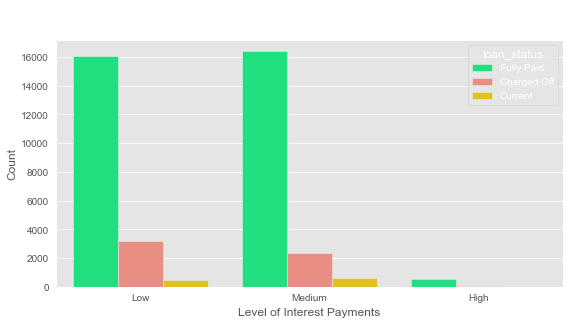

In [47]:
plt.style.use('ggplot')
plt.figure(figsize=(20,10))
cmap=plt.cm.spring
color_palette_list = ['springgreen',  'salmon','gold','#ADD8E6',   '#0099CC']
plt.subplot(221)
ax = sns.countplot(x='income_category', data=loan, palette=color_palette_list,
                  hue='loan_status')

ax.set_title('The impact of Income \n on the status of the loan', fontsize=14)
ax.set_xlabel('Level of Interest Payments', fontsize=12)
ax.set_ylabel('Count')

###### Observation: 
Low to Medium Annual Income ranges are resulting in bad loans

In [50]:
#Bivariate analysis
#Lets see how all the variables affect each purpose with respect to loan status
import seaborn as sns
#%matplotlib inline

sns.heatmap(loan, annot=True)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [49]:
file2 = os.path.join(ROOTDIR, 'Loan Processed Data3.csv') 
file3 = os.path.join(ROOTDIR, 'correlation_data.csv') 
#loan.to_csv(file2, sep='\t', encoding='utf-8')
lf_cr.to_csv(file3, sep='\t', encoding='utf-8')

In [ ]:
#Till now we have considered only applicants variables and now in univarate analysis we will consider Loan variables
#Loan variables are numeric and continous variables better we bin them according to quantile basis.
#Employee annual income is also a numeric variable which is continuos we will try bin it too
#These variables are derived metric not only for univariate analysis but also for bivariate analysis.

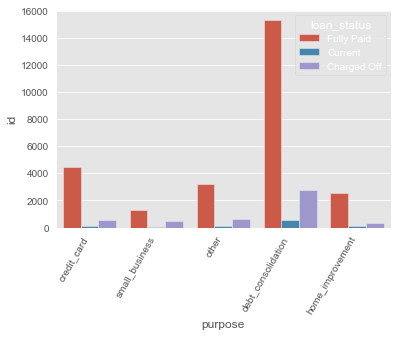

In [54]:
purpose=["credit_card","debt_consolidation","home_improvement","small_business","other"]
defaulters_loan = loan[loan['purpose'].isin(purpose)]
defaulters_loan

#Lets see purpose wise defaulters in the dataset
a=defaulters_loan.groupby(['purpose','loan_status'])['id'].transform('count')
ax=sns.barplot(data=defaulters_loan,y=a,hue='loan_status',x=defaulters_loan['purpose'])
k=plt.setp(ax.get_xticklabels(), rotation=60, horizontalalignment='right')

In [55]:
q25=defaulters_loan['loan_amnt'].quantile(.25)
q50=defaulters_loan['loan_amnt'].quantile(.5)
q75=defaulters_loan['loan_amnt'].quantile(.75)
q100=defaulters_loan['loan_amnt'].quantile(1)
print(q25,' ',q50,' ',q75,' ',q100)

#25th - 6000
#50th - 10000
#75th - 15250
#100th - 35000

6000.0   10000.0   16000.0   35000.0


In [56]:
#Adding bin
defaulters_loan=defaulters_loan.assign(amnt_bin=pd.cut(defaulters_loan['loan_amnt'],[0,6000,10000,15250,35000],labels=['Less_loan_amnt','Average_loan_amnt','High_loan_amnt','Very_high_loan_amnt']))
#defaulters_loan

In [57]:
q25=defaulters_loan['funded_amnt'].quantile(.25)
q50=defaulters_loan['funded_amnt'].quantile(.5)
q75=defaulters_loan['funded_amnt'].quantile(.75)
q100=defaulters_loan['funded_amnt'].quantile(1)
print(q25,' ',q50,' ',q75,' ',q100)

#25th - 6000
#50th - 10000
#75th - 15000
#100th - 35000

6000.0   10000.0   15000.0   35000.0


In [58]:
#Adding bin
defaulters_loan=defaulters_loan.assign(funded_amnt_bin=pd.cut(defaulters_loan['funded_amnt'],[0,6000,10000,15000,35000],labels=['Less_funded_amnt','Average_funded_amnt','High_funded_amnt','Very_high_funded_amnt']))
#defaulters_loan

In [59]:
q25=defaulters_loan['funded_amnt_inv'].quantile(.25)
q50=defaulters_loan['funded_amnt_inv'].quantile(.5)
q75=defaulters_loan['funded_amnt_inv'].quantile(.75)
q100=defaulters_loan['funded_amnt_inv'].quantile(1)
print(q25,' ',q50,' ',q75,' ',q100)

#25th - 5500
#50th - 9700
#75th - 14900
#100th - 35000

5500.0   9844.644377   14975.0   35000.0


In [60]:
#Adding bin
defaulters_loan=defaulters_loan.assign(funded_amnt_inv_bin=pd.cut(defaulters_loan['funded_amnt_inv'],[0,5500,9700,14900,35000],labels=['Less_funded_amnt_inv','Average_funded_amnt_inv','High_funded_amnt_inv','Very_high_funded_amnt_inv']))
#defaulters_loan

In [61]:
q25=defaulters_loan['int_rate'].quantile(.25)
q50=defaulters_loan['int_rate'].quantile(.5)
q75=defaulters_loan['int_rate'].quantile(.75)
q100=defaulters_loan['int_rate'].quantile(1)
print(q25,' ',q50,' ',q75,' ',q100)

#25th - 9%
#50th - 11%
#75th - 14%
#100th - 24%

9.63   11.99   14.74   24.59


In [62]:
#Adding bin
defaulters_loan=defaulters_loan.assign(int_rate_bin=pd.cut(defaulters_loan['int_rate'],[0,9,11,14,24],labels=['Less_int_rate','Average_int_rate','High_int_rate','Very_high_int_rate']))
#defaulters_loan

In [64]:
q25=defaulters_loan['installment'].quantile(.25)
q50=defaulters_loan['installment'].quantile(.5)
q75=defaulters_loan['installment'].quantile(.75)
q100=defaulters_loan['installment'].quantile(1)
print(q25,' ',q50,' ',q75,' ',q100)

#25th - 186.24
#50th - 307.05
#75th - 460.10
#100th - 1305.19

185.64   307.04   461.34   1305.19


In [65]:
#Adding bin
defaulters_loan=defaulters_loan.assign(installment_bin=pd.cut(defaulters_loan['installment'],[0,186.24,307.05,460.1,1305.19],labels=['Less_installment','Average_installment','High_installment','Very_high_installment']))
#defaulters_loan

In [66]:
q25=defaulters_loan['annual_inc'].quantile(.25)
q50=defaulters_loan['annual_inc'].quantile(.5)
q75=defaulters_loan['annual_inc'].quantile(.75)
q95=defaulters_loan['annual_inc'].quantile(.95)
q100=defaulters_loan['annual_inc'].quantile(1)
print(q25,' ',q50,' ',q75,' ',q95,' ',q100)

#25th - 42000
#50th - 60000
#75th - 84000
#95th - 144000
#100th - 6000000

42000.0   60000.0   83717.0   144000.0   6000000.0


In [67]:
#As we see there is an outlier,lets confirm this by plotting annual income with respect to loan_status
#95th percentile is 1,44,000 and 100th percentile is 6000000 that is almost a big difference
#Taking 95th percentile for analysis 

Text(0.5,1,'Annual Income Distribution \n by Loan Status')

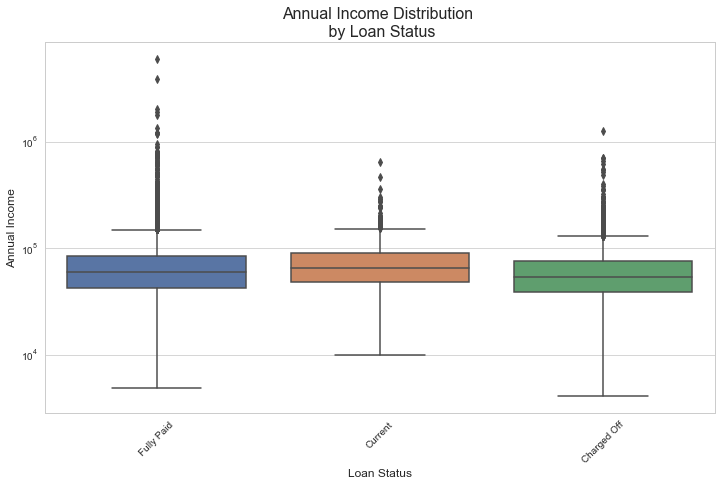

In [71]:
plt.figure(figsize=(12,15))
sns.set_style("whitegrid")
# Create a dataframe for bad loans
plt.subplot(211)
g = sns.boxplot(x='loan_status', y='annual_inc', 
               data=defaulters_loan, color='r',palette="deep")

g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Loan Status", fontsize=12)
g.set_ylabel("Annual Income", fontsize=12)
g.set_yscale('log')
g.set_title("Annual Income Distribution \n by Loan Status", fontsize=16)

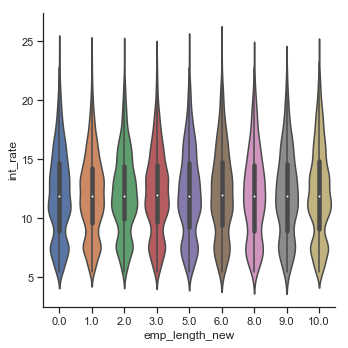

In [78]:
sns.set(style="ticks")

g = sns.catplot(x="emp_length_new", y="int_rate",  data=lf,kind="violin")

#lf had data filtered for 5 major purposes # debt_consolidation,credit_card,other,home_improvement	,major_purchase


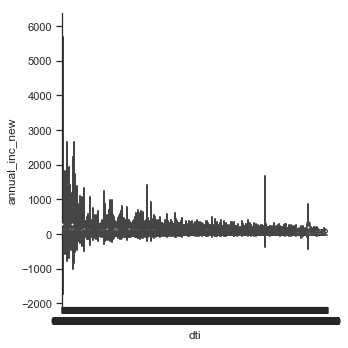

In [104]:
sns.set(style="ticks")

g = sns.catplot(x="dti", y="annual_inc_new",  data=lf,kind="violin",figsize=(16,12))


#lf had data filtered for 5 major purposes # debt_consolidation,credit_card,other,home_improvement	,major_purchase

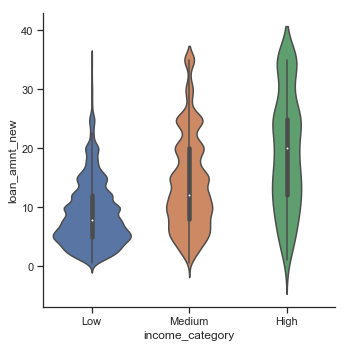

In [97]:
sns.set(style="ticks")


#g = sns.catplot(x="dti_Bin", y="annual_inc_new",  data=lf,kind="violin")
by_loanamt_anninc = sns.catplot(x="income_category", y="loan_amnt_new",  data=lf,kind="violin", figsize=(20,12))
#ax2.set_title('Annual Inc  Vs. Loan Amt', fontsize=14)

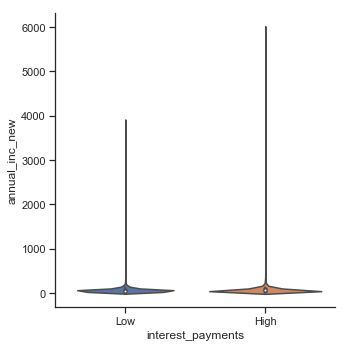

In [98]:
sns.set(style="ticks")


#g = sns.catplot(x="dti_Bin", y="annual_inc_new",  data=lf,kind="violin")
by_loanamt_anninc = sns.catplot(x="interest_payments", y="annual_inc_new",  data=lf,kind="violin", figsize=(20,12))
#ax2.set_title('Annual Inc  Vs. Loan Amt', fontsize=14)

Text(0.5,1,'Annual Inc  Vs. Loan Amt')

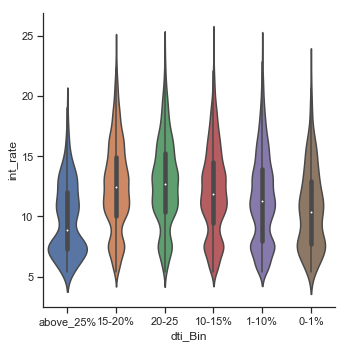

In [102]:
sns.set(style="ticks")


#g = sns.catplot(x="dti_Bin", y="annual_inc_new",  data=lf,kind="violin")
by_loanamt_anninc = sns.catplot(x="dti_Bin", y="int_rate",  data=lf,kind="violin", figsize=(20,12))
ax.set_title('Annual Inc  Vs. Loan Amt', fontsize=14)

Text(0.5,1,'DTI Vs. Loan amount')

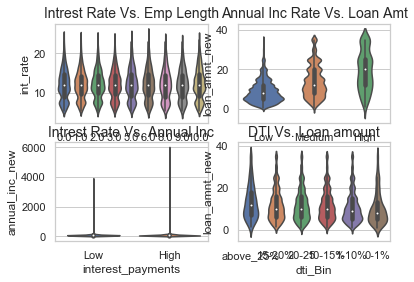

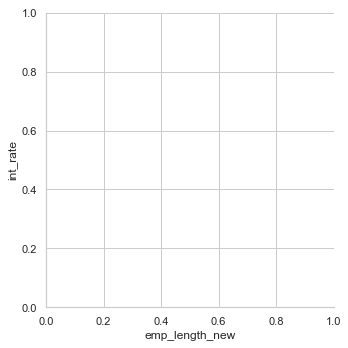

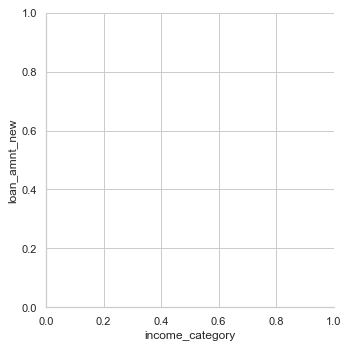

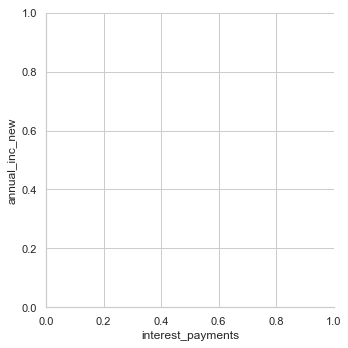

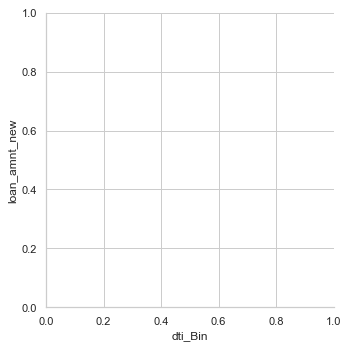

In [93]:
sns.set_style('whitegrid')

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
cmap = plt.cm.inferno
fig.tight_layout()

by_emplen_intrate = sns.catplot(x="emp_length_new", y="int_rate",  data=lf,kind="violin", ax=ax1, figsize=(16,12))
ax1.set_title('Intrest Rate Vs. Emp Length', fontsize=14)


by_loanamt_anninc = sns.catplot(x="income_category", y="loan_amnt_new",  data=lf,kind="violin", ax=ax2, figsize=(16,12))
ax2.set_title('Annual Inc Rate Vs. Loan Amt', fontsize=14)


by_anninc_intrate = sns.catplot(x="interest_payments", y="annual_inc_new",  data=lf,kind="violin", ax=ax3, figsize=(16,12))
ax3.set_title('Intrest Rate Vs. Annual Inc', fontsize=14)

by_loanamt_dti = sns.catplot(x="dti_Bin", y="loan_amnt_new",  data=lf,kind="violin", ax=ax4, figsize=(16,12))
ax4.set_title('DTI Vs. Loan amount', fontsize=14)



In [88]:
lf

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,emp_length_new,Annual_Inc_Bin,Emp_Len_Bin,dti_Bin,interest_payments,income_category
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,12/11/2018,Fully Paid,credit_card,Computer,27.65,0,Jan-85,1,3,0,13648,83.70%,9,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.0000,1/15/2018,171.62,5/16/2018,10.0,10-25k,Above 10Yr,above_25%,Low,Low
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,12/11/2018,Fully Paid,other,personel,20.00,0,Feb-96,1,10,0,5598,21%,37,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.0000,1/15/2018,357.48,4/16/2018,10.0,25-50k,Above 10Yr,15-20%,High,Low
4,1075358,1311748,3000,3000,3000.00000,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.00,Source Verified,12/11/2018,Current,other,Personal,17.94,0,Jan-96,0,15,0,27783,53.90%,38,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.0000,5/16/2018,67.79,5/16/2018,1.0,75-100k,1Yr-3Yr,15-20%,High,Medium
6,1069639,1304742,7000,7000,7000.00000,60 months,15.96,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.00,Not Verified,12/11/2018,Fully Paid,debt_consolidation,Loan,23.51,0,5-Jul,1,7,0,17726,85.60%,11,10110.840000,10110.84,6985.61,3125.23,0.00,0.00,0.0000,5/16/2018,1313.76,5/16/2018,8.0,25-50k,7Yr-9Yr,20-25,High,Low
9,1071570,1306721,5375,5375,5350.00000,60 months,12.69,121.45,B,B5,Starbucks,< 1 year,RENT,15000.00,Verified,12/11/2018,Charged Off,other,Building my credit history.,18.08,0,4-Sep,0,2,0,9279,36.50%,3,1476.190000,1469.34,673.48,533.42,0.00,269.29,2.5200,11/12/2018,121.45,3/13/2018,1.0,10-25k,Below 1Yr,15-20%,High,Low
10,1070078,1305201,6500,6500,6500.00000,60 months,14.65,153.45,C,C3,Southwest Rural metro,5 years,OWN,72000.00,Not Verified,12/11/2018,Fully Paid,debt_consolidation,High intrest Consolidation,16.12,0,Jan-98,2,14,0,4032,20.60%,23,7678.017673,7678.02,6500.00,1178.02,0.00,0.00,0.0000,6/13/2018,1655.54,12/15/2018,5.0,50-75k,4Yr-6Yr,15-20%,High,Medium
11,1069908,1305008,12000,12000,12000.00000,36 months,12.69,402.54,B,B5,UCLA,10+ years,OWN,75000.00,Source Verified,12/11/2018,Fully Paid,debt_consolidation,Consolidation,10.78,0,Oct-89,0,12,0,23336,67.10%,34,13947.989160,13947.99,12000.00,1947.99,0.00,0.00,0.0000,9/13/2018,6315.30,8/13/2018,10.0,50-75k,Above 10Yr,10-15%,High,Medium
12,1064687,1298717,9000,9000,9000.00000,36 months,13.49,305.38,C,C1,Va. Dept of Conservation/Recreation,< 1 year,RENT,30000.00,Source Verified,12/11/2018,Charged Off,debt_consolidation,freedom,10.08,0,4-Apr,1,4,0,10452,91.70%,9,2270.700000,2270.70,1256.14,570.26,0.00,444.30,4.1600,7/12/2018,305.38,11/12/2018,1.0,25-50k,Below 1Yr,10-15%,High,Low
13,1069866,1304956,3000,3000,3000.00000,36 months,9.91,96.68,B,B1,Target,3 years,RENT,15000.00,Source Verified,12/11/2018,Fully Paid,credit_card,citicard fund,12.56,0,3-Jul,2,11,0,7323,43.10%,11,3480.269999,3480.27,3000.00,480.27,0.00,0.00,0.0000,1/15/2018,102.43,5/16/2018,3.0,10-25k,1Yr-3Yr,10-15%,Low,Low
14,1069057,1303503,10000,10000,10000.00000,36 months,10.65,325.74,B,B2,SFMTA,3 years,RENT,100000.00,Source Verified,12/11/2018,Charged Off,other,Other Loan,7.06,0,May-91,2,14,0,11997,55.50%,29,7471.990000,7471.99,5433.47,1393.42,0.00,645.10,6.3145,10/13/2018,325.74,3/14/2018,3.0,75-100k,1Yr-3Yr,1-10%,Low,Medium
